In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv("data/df_modified.csv")
df

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,44,3.1,7.0,6.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0
1,30,5.1,7.0,8.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0
2,23,7.4,6.0,7.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1
3,36,5.7,7.0,8.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0
4,34,7.0,4.0,7.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,23,6.9,5.0,7.0,4.0,2.0,10.0,0,1,0,0,0,0,0,1,0
496,43,5.6,7.0,6.0,5.0,2.0,9.0,1,0,0,1,0,0,0,0,0
497,41,7.7,5.0,7.0,2.0,2.0,8.0,0,1,0,0,0,1,0,0,0
498,23,4.2,9.0,7.0,0.0,2.0,9.0,0,1,0,1,0,0,0,0,0


In [40]:
feature_cols = ['Age',
                'Daily_Screen_Time(hrs)',
                'Sleep_Quality(1-10)',
                'Days_Without_Social_Media',
                'Exercise_Frequency(week)',
                'Happiness_Index(1-10)',
                'Gender_Female', 'Gender_Male', 'Gender_Other',
                'Social_Media_Platform_Facebook',
                'Social_Media_Platform_Instagram',
                'Social_Media_Platform_LinkedIn',
                'Social_Media_Platform_TikTok',
                'Social_Media_Platform_X (Twitter)',
                'Social_Media_Platform_YouTube']

X = df[feature_cols]
y = df['Stress_Level(1-10)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance")
print("MSE:", mse)
print("MAE:", mae)
print("R^2:", r2)


Random Forest Regressor Performance
MSE: 1.1525618181818182
MAE: 0.8503636363636364
R^2: 0.5125594883027309


In [ ]:
imp_rf = pd.Series(reg.feature_importances_, index=feature_cols).sort_values(ascending=False)
print("\nFeature Importances:")
print(imp_rf)


Feature Importances:
Daily_Screen_Time(hrs)               0.647175
Age                                  0.090890
Days_Without_Social_Media            0.064286
Exercise_Frequency(week)             0.056630
Sleep_Quality(1-10)                  0.039377
Social_Media_Platform_LinkedIn       0.018312
Social_Media_Platform_Instagram      0.014958
Social_Media_Platform_X (Twitter)    0.014028
Social_Media_Platform_Facebook       0.010703
Social_Media_Platform_YouTube        0.010356
Gender_Female                        0.009849
Social_Media_Platform_TikTok         0.008837
Gender_Male                          0.008707
Gender_Other                         0.005893
dtype: float64


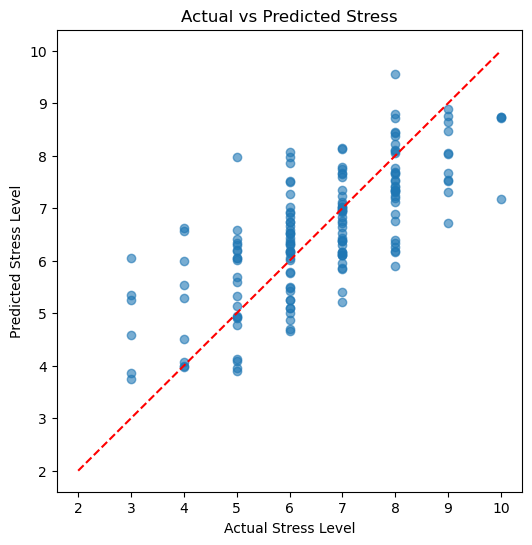

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Stress Level')
plt.ylabel('Predicted Stress Level')
plt.title('Actual vs Predicted Stress')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.show()
